In [97]:
import matplotlib.pyplot as plt
import numpy as np
import json
from space import Space

index = 90
with open(f'policies/value_function_{index}.json') as json_file:
  value_function = json.load(json_file)
with open(f'policies/policy_{index}.json') as json_file:
  policy = json.load(json_file)

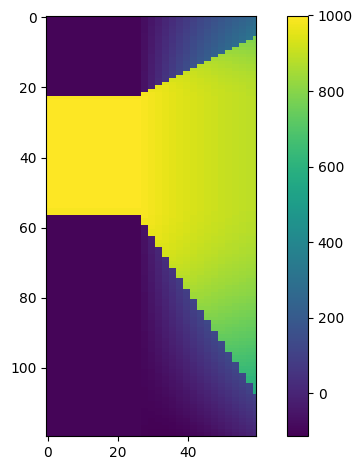

In [98]:
# height = 25
height = 9

values = np.zeros((120, 60))
for i in range(120):
  for j in range(60):
    state = f"({i}, {height}, {j})"
    values[i, j] = value_function[state]

fig, ax = plt.subplots()
im = ax.imshow(values)

fig.colorbar(im)

fig.tight_layout()
plt.show()

In [99]:
state = (97, 9, 50)
next_state = (98, 9, 48)

print(policy[str(state)], value_function[str(state)])
print(policy[str(next_state)], value_function[str(next_state)])

player_height = state[0] * 8
pipe1_height = (state[1] * 4) + 150
pipe2_height = pipe1_height + 300
pipe_distance = state[2] * 8

print(player_height, pipe1_height, pipe2_height, 40 - (0.5 * (pipe1_height + 10 - player_height)), 40 - (0.5 * (player_height + 80 - pipe2_height)))

1 103.54929132416768
1 75.71824940481733
776 186 486 330.0 -145.0


In [71]:
from collections import defaultdict
nib = defaultdict(int)
for state in policy.keys():
    action = policy[state]
    nib[action] += 1

print(nib)

defaultdict(<class 'int'>, {0: 539253, 1: 108746})
